<a href="https://colab.research.google.com/github/mohammadsanaee/ML_in_application/blob/main/12_tsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Time Series Analysis

Synthetic data with trends and seasonal effects

In [ ]:
import numpy as np
import pandas as pd

def generate_data(
    n_samples=1000,
    y_0=0,  # first value
    trend_type='linear',  # linear, exponential
    # linear trend: b*t
    # exponential trend: b^t
    trend_b=0,
    period_type='additive',  # additive, multiplicative
    # additive period: trend + period_scale * (1 + sin(2 * pi * t / period) / 2)
    period=None,
    period_scale=0,
    noise_std=0.0,
    random_seed=0,
):
    # start with level y_0
    data = y_0 * np.ones(n_samples)
    trend = np.zeros(n_samples)
    if trend_type == "linear":
        # add linear trend
        trend = trend_b * np.arange(0, n_samples)
        data += trend
    elif trend_type == "exponential":
        # multiply by exponential trend
        trend = np.power(trend_b, np.arange(0, n_samples))
        data *= trend
    else:
        raise ValueError(f"unknown trend_type='{trend_type}'")

    # add either additive or multiplicative period
    seasonal = np.zeros(n_samples)
    if period is not None:
        seasonal = period_scale * (1 + np.sin(np.arange(0, n_samples) * 2 * np.pi / period) / 2)
        if period_type == "additive":
            data += seasonal
        elif period_type == "multiplicative":
            data *= seasonal
        else:
            raise ValueError(f"unknown period_type='{period_type}'")

    # add noise (== unpredictable factors)
    noise = np.zeros(n_samples)
    if noise_std > 0:
        np.random.seed(random_seed)
        noise = np.random.normal(scale=noise_std, size=n_samples)
        data += noise

    return pd.DataFrame({'data': data, 'trend': trend, 'seasonal': seasonal, 'noise': noise})


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe8c55dbe0>,
      dtype=object)

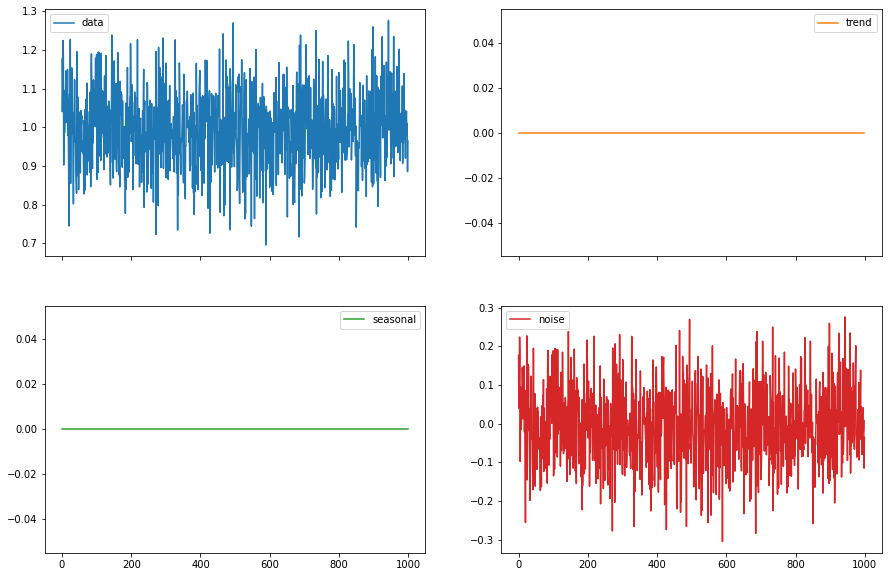

In [ ]:
# stationary time series
df_stationary = generate_data(
    y_0=1,
    noise_std=0.1,
)
df_stationary.plot(subplots=True, layout=(-1,2), figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe89af0d30>,
      dtype=object)

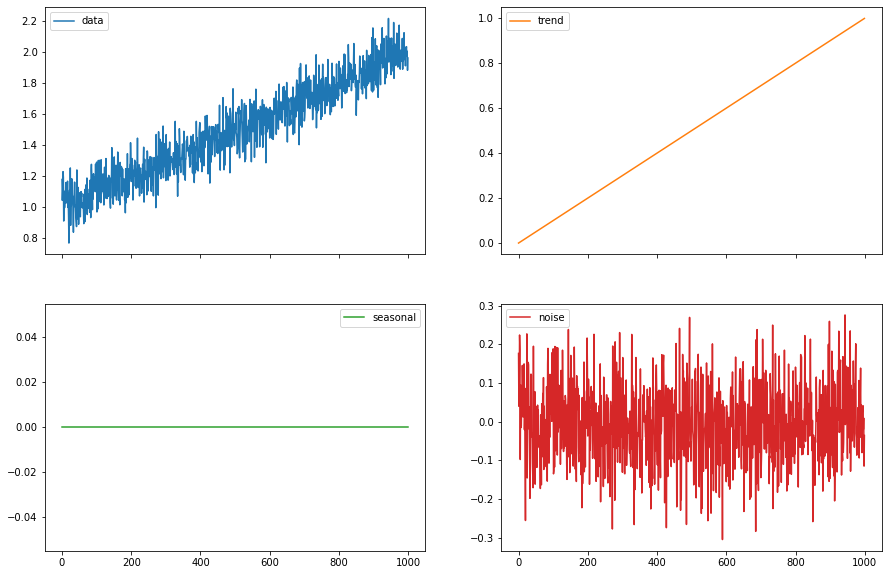

In [ ]:
# linear trend
df_linear_trend = generate_data(
    y_0=1,
    trend_type="linear",
    trend_b=0.001,
    noise_std=0.1,
)
df_linear_trend.plot(subplots=True, layout=(-1,2), figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe899f74c0>,
      dtype=object)

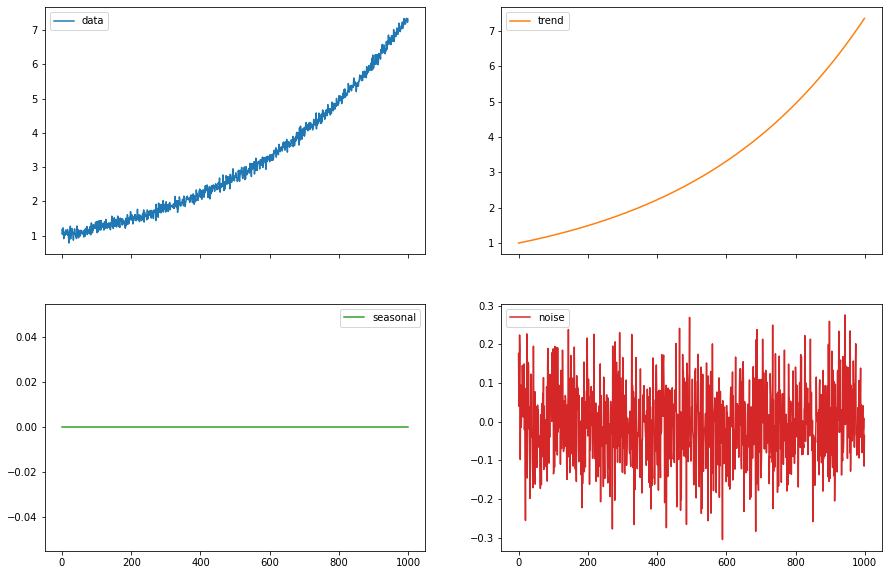

In [ ]:
# exponential trend
df_exp_trend = generate_data(
    y_0=1,
    trend_type="exponential",
    trend_b=1.002,
    noise_std=0.1,
)
df_exp_trend.plot(subplots=True, layout=(-1,2), figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe8d864040>,
      dtype=object)

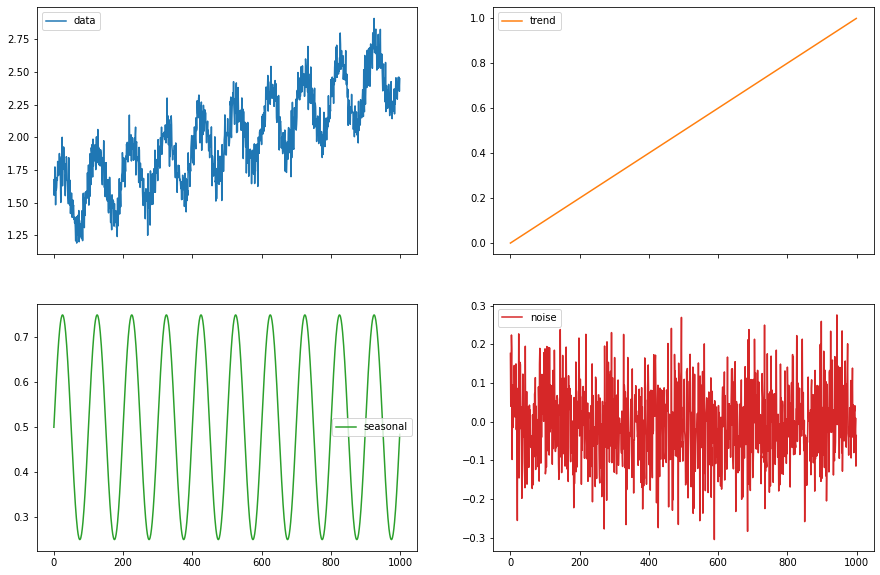

In [ ]:
# linear trend with additive seasonality
df_linear_trend_additive_period = generate_data(
    y_0=1,
    trend_type="linear",
    trend_b=0.001,
    period_type="additive",
    period=100,
    period_scale=0.5,
    noise_std=0.1,
)
df_linear_trend_additive_period.plot(subplots=True, layout=(-1,2), figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe8c5362e0>,
      dtype=object)

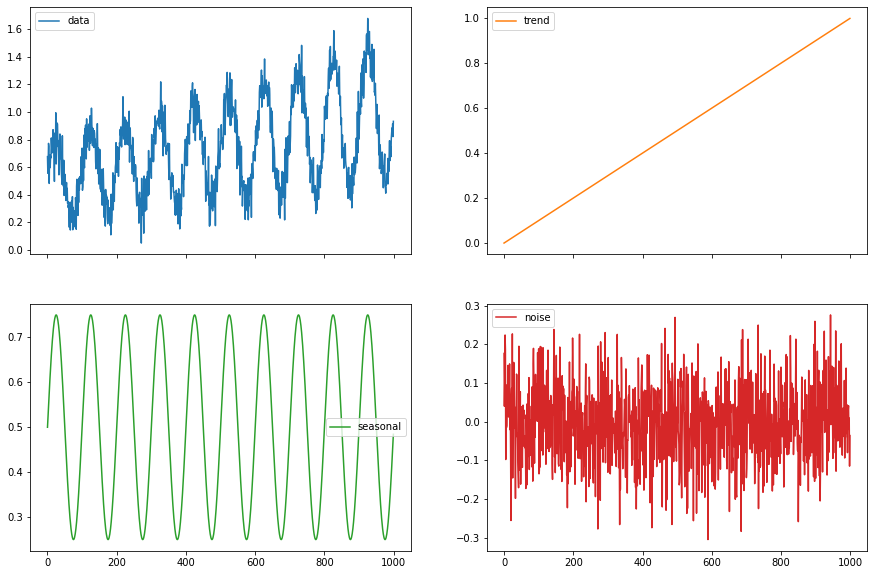

In [ ]:
# linear trend with multiplicative seasonality
df_linear_trend_multiplicative_period = generate_data(
    y_0=1,
    trend_type="linear",
    trend_b=0.001,
    period_type="multiplicative",
    period=100,
    period_scale=0.5,
    noise_std=0.1,
)
df_linear_trend_multiplicative_period.plot(subplots=True, layout=(-1,2), figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe897d1340>,
      dtype=object)

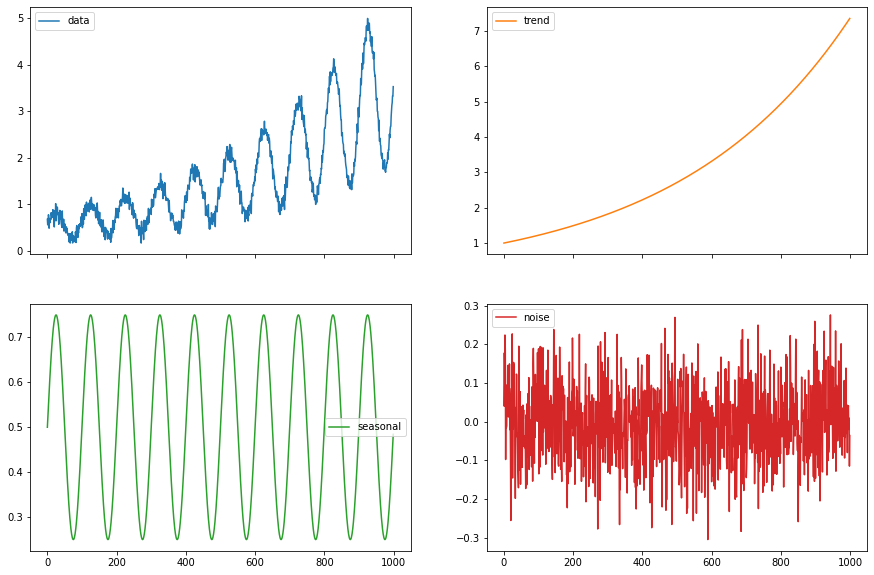

In [ ]:
# exponential trend with multiplicative seasonality
df_exp_trend_multiplicative_period = generate_data(
    y_0=1,
    trend_type="exponential",
    trend_b=1.002,
    period_type="multiplicative",
    period=100,
    period_scale=0.5,
    noise_std=0.1,
)
df_exp_trend_multiplicative_period.plot(subplots=True, layout=(-1,2), figsize=(15, 10))

## Exponential smoothing

In [ ]:
def fit_exponential_smoothing(series, init=0.0, alpha=0.0):
    """
    Implements the algorithm y_pred_t+1 = y_t + alpha * (y_t - y_pred_t)
    """
    next_prediction = init
    predictions = []
    for y in series:
        predictions.append(next_prediction)
        next_prediction += alpha * (y - next_prediction)
    return predictions, (next_prediction,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe896a3b80>,
      dtype=object)

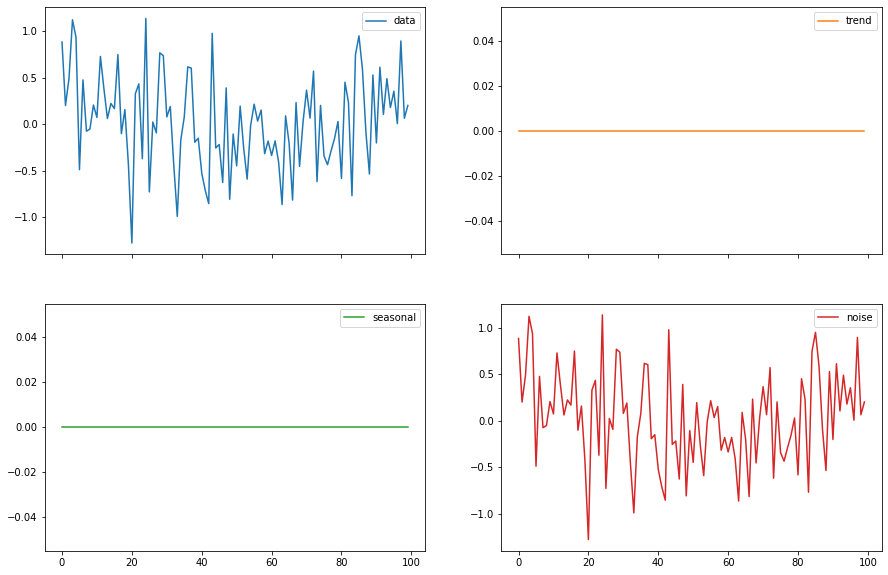

In [ ]:
df = generate_data(
    n_samples=100,
    y_0=0.0,
    noise_std=0.5
)
df.plot(subplots=True, layout=(-1,2), figsize=(15, 10))

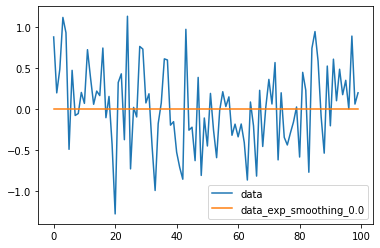

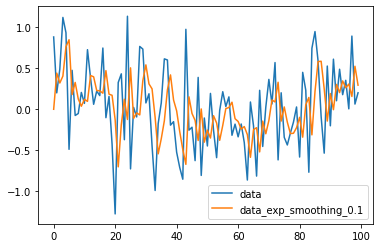

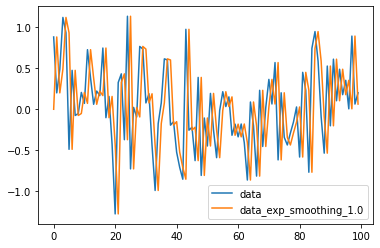

In [ ]:
# try different alphas
df['data_exp_smoothing_0.0'] = fit_exponential_smoothing(df.data, alpha=0.0)[0]
df['data_exp_smoothing_0.1'] = fit_exponential_smoothing(df.data, alpha=0.5)[0]
df['data_exp_smoothing_1.0'] = fit_exponential_smoothing(df.data, alpha=1.0)[0]
df[['data', 'data_exp_smoothing_0.0']].plot()
df[['data', 'data_exp_smoothing_0.1']].plot()
df[['data', 'data_exp_smoothing_1.0']].plot()

Compare different $\alpha$-s using MSE.
We can compare MSE _on the training set_, because for each $t$ we don't use $y_t$ for prediction (the formula is $\hat{y}_t = \hat{y}_{t-1} + \alpha \cdot (y_{t-1} - \hat{y}_{t-1})$.


In [ ]:
print("alpha = 0.0, MSE =", mean_squared_error(df['data'], df['data_exp_smoothing_0.0']))
print("alpha = 0.1, MSE =", mean_squared_error(df['data'], df['data_exp_smoothing_0.1']))
print("alpha = 1.0, MSE =", mean_squared_error(df['data'], df['data_exp_smoothing_1.0']))

alpha = 0.0, MSE = 0.25485090448427616
alpha = 0.1, MSE = 0.3126189429631867
alpha = 1.0, MSE = 0.4718281000922586


Now we can choose optimal $\alpha$ using grid search.

optimal alpha = 0.07500000000000001


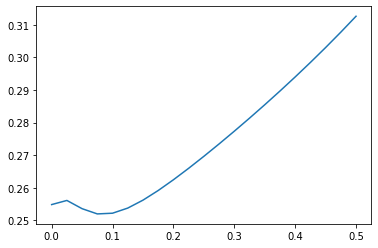

In [ ]:
alphas = np.linspace(0, 0.5, 21)
errors = []
for alpha in alphas:
    predictions = fit_exponential_smoothing(df.data, alpha=alpha)[0]
    errors.append(mean_squared_error(df.data, predictions))

best_alpha = alphas[np.argmin(errors)]
print("optimal alpha =", best_alpha)
plt.plot(alphas, errors)

We see that the optimum is achieved for small $\alpha$ (rule-of-thumb: $\alpha < 0.3$), which indicates that the data is stationary.

Since Exponential Smoothing assumes that the data is stationary, its *forecast* (future prediction) is a constant.

In [ ]:
def exponential_smoothing_forecast(n_steps, parameters):
    """
    Predict for n steps in the future, using `parameters`
    returned by the function `fit_exponential_smoothing()`
    """
    prediction = parameters[0]
    return prediction * np.ones(n_steps)

We can split the data into train and validation and estimate quality of the forecast

In [ ]:
def evaluate_forecast_quality(
    train_data,
    validation_data,
    train_predictions,
    validation_forecast,
    figsize=(10, 7),
):
    """
    Evaluate and visualize time series prediction model.
    The setup:
        - train_data is in the past, the model trains on it and returns train_predictions
        - validation_data is in the future, the model returns forecast based on trained parameters
    """
    print("In-sample MSE:", mean_squared_error(train_data, train_predictions))
    print("Forecast MSE:", mean_squared_error(validation_data, validation_forecast))
    df_train = pd.DataFrame({
        'train_data': train_data,
        'train_predictions': train_predictions, 
    })
    df_val = pd.DataFrame({
        'validation_data': validation_data,
        'validation_forecast': validation_forecast,
    })
    df = pd.concat([df_train, df_val], axis=1)
    df.plot(figsize=figsize)

In-sample MSE: 0.24849258426521806
Forecast MSE: 0.34018724521724053


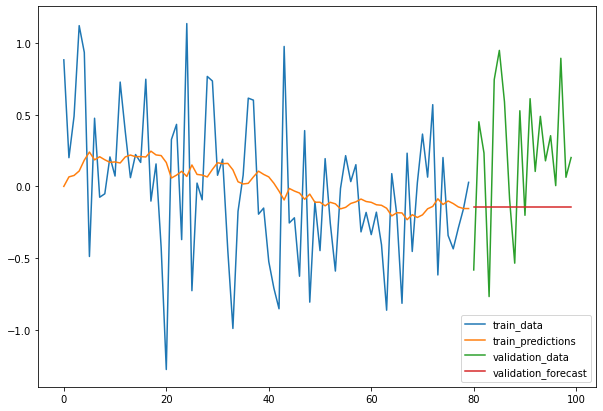

In [ ]:
df_train, df_val = train_test_split(df, test_size=0.2, shuffle=False)
# fit the model
# we know that the data is stationary, so the best alpha is actually 0
# but we don't cheat here and use best_alpha
predictions, parameters = fit_exponential_smoothing(df_train.data, alpha=best_alpha)
# compute forecast
forecast = exponential_smoothing_forecast(df_val.shape[0], parameters)
evaluate_forecast_quality(df_train.data, df_val.data, predictions, forecast)

What if we add trend?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe8935d430>,
      dtype=object)

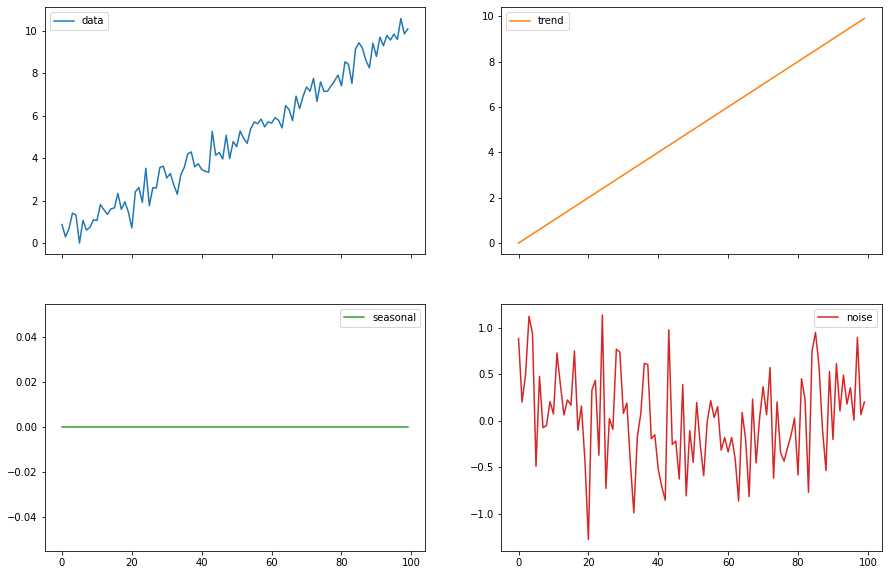

In [ ]:
df = generate_data(
    n_samples=100,
    y_0=0.0,
    noise_std=0.5,
    trend_type='linear',
    trend_b=0.1,
)
df.plot(subplots=True, layout=(-1,2), figsize=(15, 10))

optimal alpha = 0.45


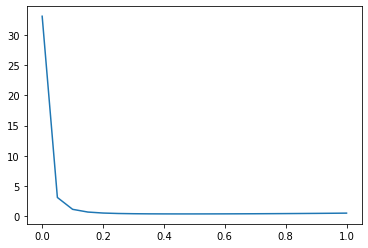

In [ ]:
alphas = np.linspace(0, 1, 21)
errors = []
for alpha in alphas:
    predictions = fit_exponential_smoothing(df.data, alpha=alpha)[0]
    errors.append(mean_squared_error(df.data, predictions))

best_alpha = alphas[np.argmin(errors)]
print("optimal alpha =", best_alpha)
plt.plot(alphas, errors)

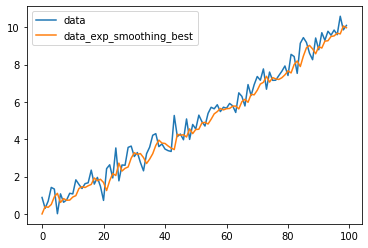

In [ ]:
df['data_exp_smoothing_best'] = fit_exponential_smoothing(df.data, alpha=best_alpha)[0]
df[['data', 'data_exp_smoothing_best']].plot()

Optimal $\alpha$ is high, it means that the model tends to ignore the past and look only at recent data. This indicates that the data is not stationary, and a model of trend is required. The demonstration below shows that in-sample performance is good (because the model is adaptive), but the forecast quickly diverges.

In-sample MSE: 0.3424151102967684
Forecast MSE: 2.879655569662585


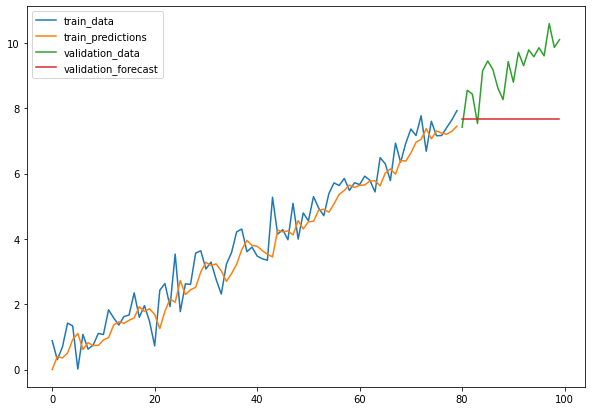

In [ ]:
df_train, df_val = train_test_split(df, test_size=0.2, shuffle=False)
predictions, parameters = fit_exponential_smoothing(df_train.data, alpha=best_alpha)
forecast = exponential_smoothing_forecast(df_val.shape[0], parameters)
evaluate_forecast_quality(df_train.data, df_val.data, predictions, forecast)

## Holt's model

In [ ]:
def fit_linear_trend_model(series, init_a=0.0, init_b=0.0, alpha_1=0.0, alpha_2=0.0):
    next_a = init_a
    next_b = init_b
    predictions = []
    for y in series:
        a, b = next_a, next_b
        predictions.append(next_a + next_b)
        next_a = alpha_1 * y + (1 - alpha_1) * (a + b)
        next_b = alpha_2 * (next_a - a) + (1 - alpha_2) * b
    return predictions, (next_a, next_b)

optimal alpha_1 = 0.025


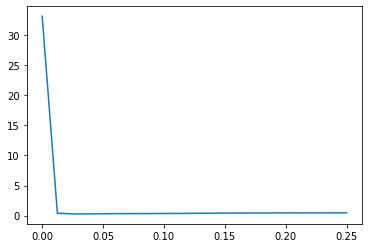

In [ ]:
alphas = np.linspace(0, 0.25, 21)
errors = []
for alpha in alphas:
    # fix alpha_2 and tune alpha_1 only
    predictions = fit_linear_trend_model(df.data, alpha_1=alpha, alpha_2=1)[0]
    errors.append(mean_squared_error(df.data, predictions))

best_alpha_1 = alphas[np.argmin(errors)]
print("optimal alpha_1 =", best_alpha_1)
plt.plot(alphas, errors)

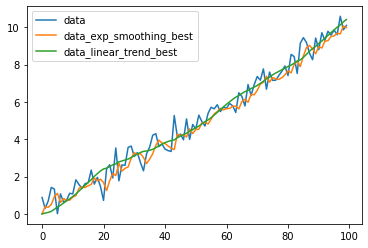

In [ ]:
df['data_linear_trend_best'] = fit_linear_trend_model(df.data, alpha_1=best_alpha_1, alpha_2=1)[0]
df[['data', 'data_exp_smoothing_best', 'data_linear_trend_best']].plot()

In [ ]:
def linear_trend_model_forecast(n_steps, parameters):
    """
    For the model with trend, the forecast at time t is a + b * t
    """
    a, b = parameters
    return a + b * np.arange(1, n_steps+1)

In-sample MSE: 0.2845458938305202
Forecast MSE: 0.3820523263229755


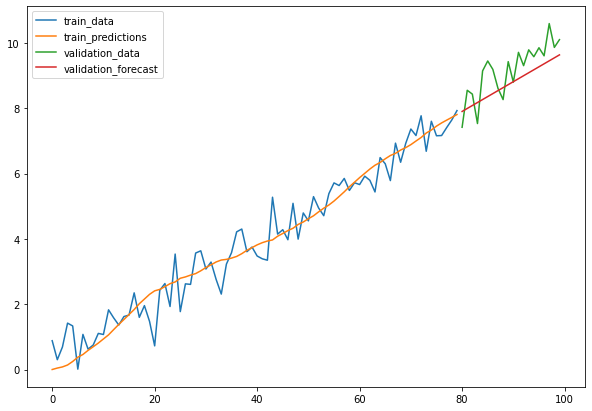

In [ ]:
df_train, df_val = train_test_split(df, test_size=0.2, shuffle=False)
predictions, parameters = fit_linear_trend_model(df_train.data, alpha_1=best_alpha_1, alpha_2=1)
forecast = linear_trend_model_forecast(df_val.shape[0], parameters)
evaluate_forecast_quality(df_train.data, df_val.data, predictions, forecast)

## Time series analysis with `statsmodels.tsa`

`statsmodels` library provides implementations of various statistical models.
Models for time series analysis (TSA in short) are implemented in the module `statsmodels.tsa`. In particular, different models of exponential smoothing (with thends and seasonality) are implemented in [statsmodels.tsa.holtwinters.ExponentialSmoothing](https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html#statsmodels.tsa.holtwinters.ExponentialSmoothing) (with different parameters)

`statsmodels.tsa.holtwinters.ExponentialSmoothing` has the following interface:
- `__init__(time_series, **parameter)` method accepts time series as the first argument, and optional (hyper)parameters which depend on the model.
- `fit()` method fits the model and finds its parameters (like we did with functions `fit_exponential_smoothing()` and `fit_linear_model_trend()`). This method returns the "result" of training on `time_series` - it contains:
  - parameters, learned from `time_series`
  - `fittedvalues` attribute, which stores predictions on training data (`time_series`)
  - `forecast(n_steps)` method, which makes out-of-sample predictions for the next `n_steps` time steps.


The correspondence between `statsmodels.tsa.holtwinters.ExponentialSmoothing` models and models in the lecture is the following:

Model from lecture | Parameters of `statsmodels.tsa.holtwinters.ExponentialSmoothing`
--- | ---
Exponential smoothing | `trend=None`, `seasonal=None`
Holt's model | `trend="add"`, `seasonal=None`
Holt-Winters' model with additive seasonality | `trend="add"`, `seasonal="add"`
Holt-Winters' model with multiplicative seasonality | `trend="add"`, `seasonal="mul"`
Holt-Winters' model with exponential trend | `trend="mul"`, `seasonal="mul"`


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Predict stationary time series using simple exponential smoothing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe89103610>,
      dtype=object)

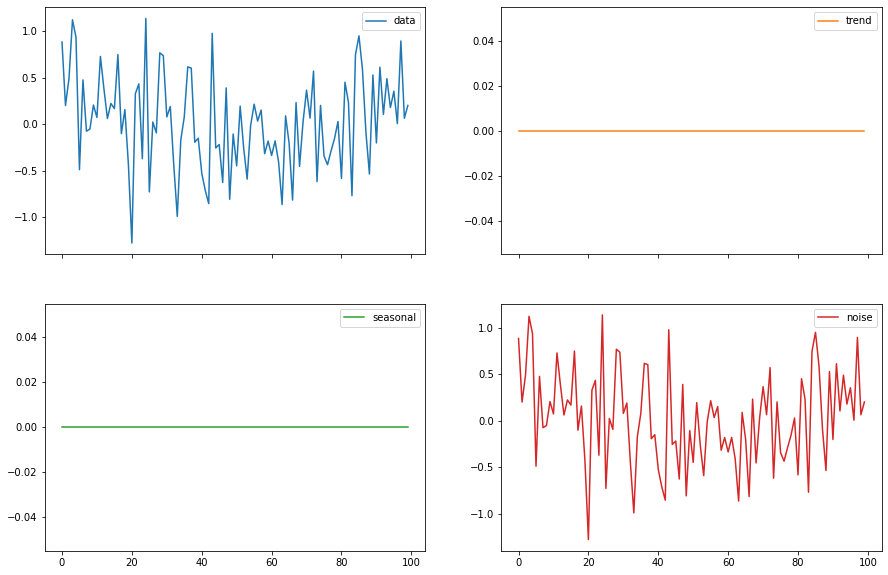

In [ ]:
df = generate_data(
    n_samples=100,
    y_0=0.0,
    noise_std=0.5
)
df.plot(subplots=True, layout=(-1,2), figsize=(15, 10))

In-sample MSE: 0.24189914821215833
Forecast MSE: 0.34000404781335103


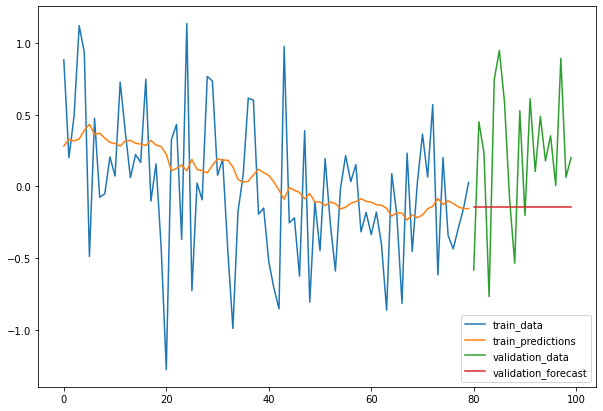

In [ ]:
df_train, df_val = train_test_split(df, test_size=0.2, shuffle=False)

fit_result = ExponentialSmoothing(
    df_train.data,
    # initialize with level 0
    initialization_method='known', initial_level=0.0,
    # no trend or seasonal component (stationary)
    trend=None, seasonal=None
).fit()
forecast = fit_result.forecast(df_val.shape[0])
evaluate_forecast_quality(df_train.data, df_val.data, fit_result.fittedvalues, forecast)

Linear trend

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe88ff2d60>,
      dtype=object)

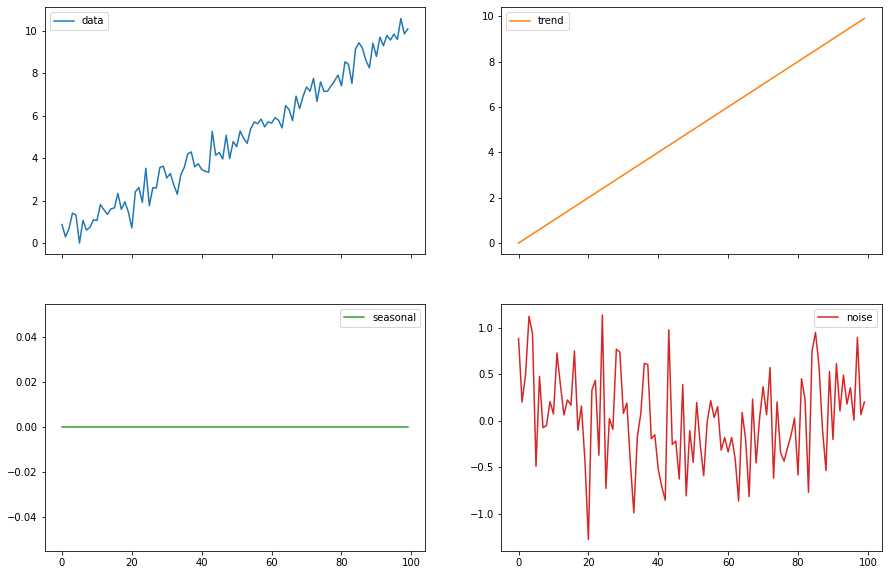

In [ ]:
df = generate_data(
    n_samples=100,
    y_0=0.0,
    noise_std=0.5,
    trend_type='linear',
    trend_b=0.1,
)
df.plot(subplots=True, layout=(-1,2), figsize=(15, 10))

In-sample MSE: 0.22384288771482677
Forecast MSE: 0.5811897970852875


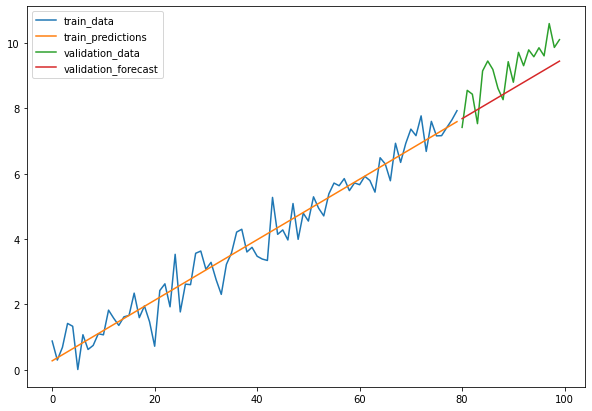

In [ ]:
df_train, df_val = train_test_split(df, test_size=0.2, shuffle=False)

fit_result = ExponentialSmoothing(
    df_train.data,
    # assume linear trend only (no seasonal component)
    trend="add", seasonal=None,
    # set initial trend to 0
    initialization_method='known', initial_level=0.0, initial_trend=0.0,
).fit()
forecast = fit_result.forecast(df_val.shape[0])
evaluate_forecast_quality(df_train.data, df_val.data, fit_result.fittedvalues, forecast)

Linear trend, additive seasonality

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe88da4d30>,
      dtype=object)

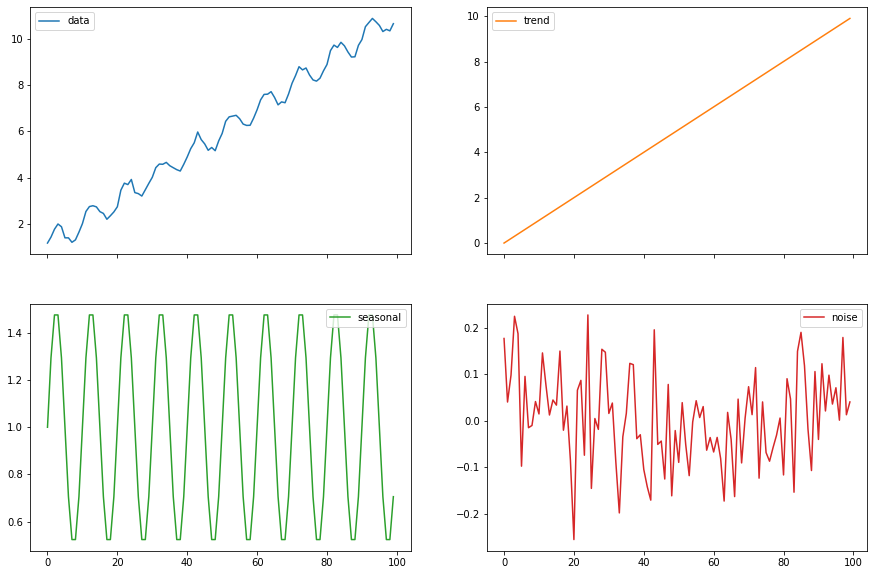

In [ ]:
df = generate_data(
    n_samples=100,
    y_0=0.0,
    trend_type="linear",
    trend_b=0.1,
    period_type="additive",
    period=10,
    period_scale=1.0,
    noise_std=0.1,
)
df.plot(subplots=True, layout=(-1,2), figsize=(15, 10))

In-sample MSE: 0.00815822736643063
Forecast MSE: 0.022328618506058533


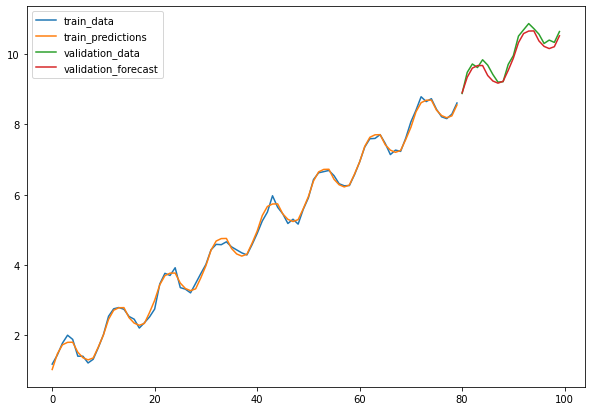

In [ ]:
df_train, df_val = train_test_split(df, test_size=0.2, shuffle=False)

fit_result = ExponentialSmoothing(
    df_train.data,
    # assume linear trend and additive seasonality
    trend="add", seasonal="add",
    # set initial trend to 0
    initialization_method='known', initial_level=0.0, initial_trend=0.0,
    # we should know the period
    # initialize seasonal as 0
    seasonal_periods=10, initial_seasonal=0.0,
).fit()
forecast = fit_result.forecast(df_val.shape[0])
evaluate_forecast_quality(df_train.data, df_val.data, fit_result.fittedvalues, forecast)

Linear trend, multiplicative seasonality

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe88be18e0>,
      dtype=object)

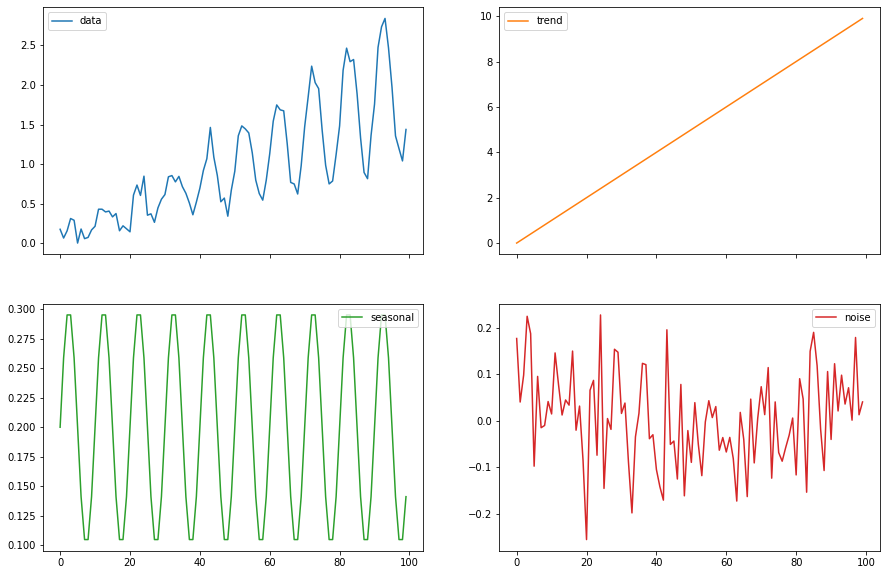

In [ ]:
df = generate_data(
    n_samples=100,
    y_0=0.0,
    trend_type="linear",
    trend_b=0.1,
    period_type="multiplicative",
    period=10,
    period_scale=0.2,
    noise_std=0.1,
)
df.plot(subplots=True, layout=(-1,2), figsize=(15, 10))

In-sample MSE: 0.00808003338787414
Forecast MSE: 0.02208616386471467


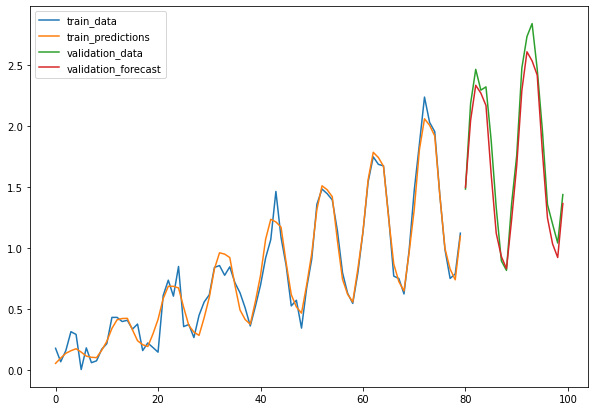

In [ ]:
df_train, df_val = train_test_split(df, test_size=0.2, shuffle=False)

fit_result = ExponentialSmoothing(
    df_train.data,
    # assume linear trend and multiplicative seasonality
    trend="add", seasonal="mul",
    # set initial trend to 0
    initialization_method='known', initial_level=0.0, initial_trend=0.0,
    # we should know the period
    seasonal_periods=10, initial_seasonal=1.0,
).fit()
forecast = fit_result.forecast(df_val.shape[0])
evaluate_forecast_quality(df_train.data, df_val.data, fit_result.fittedvalues, forecast)

Exponential trend, multiplicative seasonality

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe88c50160>,
      dtype=object)

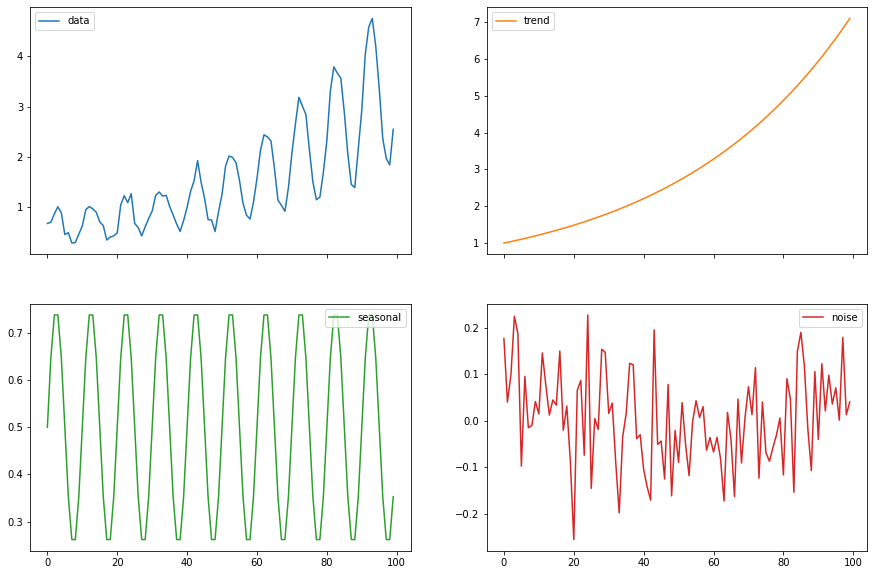

In [ ]:
df = generate_data(
    n_samples=100,
    y_0=1,
    trend_type="exponential",
    trend_b=1.02,
    period_type="multiplicative",
    period=10,
    period_scale=0.5,
    noise_std=0.1,
)
df.plot(subplots=True, layout=(-1,2), figsize=(15, 10))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In-sample MSE: 0.008704490557471065
Forecast MSE: 0.011251836465680207


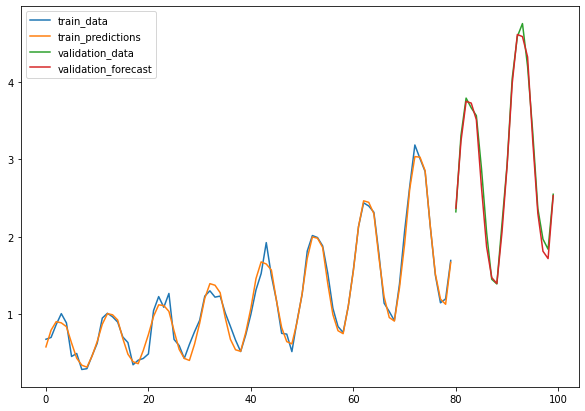

In [ ]:
df_train, df_val = train_test_split(df, test_size=0.2, shuffle=False)

fit_result = ExponentialSmoothing(
    df_train.data,
    # assume exponential trend and multiplicative seasonality
    trend="mul", seasonal="mul",
    # set initial trend to 0
    initialization_method='known', initial_level=1.0, initial_trend=1.0,
    # we should know the period
    seasonal_periods=10, initial_seasonal=1.0,
).fit()
forecast = fit_result.forecast(df_val.shape[0])
evaluate_forecast_quality(df_train.data, df_val.data, fit_result.fittedvalues, forecast)

## Visualize using `series_decompose`

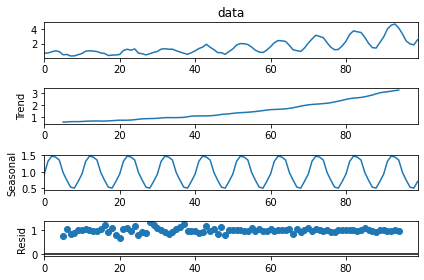

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df.data, model='multiplicative', period=10)
result.plot()
plt.show()

# Real data

## Electric production data

In [ ]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/horoshenkih/harbour-space/master/datasets/Electric_Production.csv",
    names=["date", "value"], header=0, parse_dates=[0])
df.head()

,date,value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


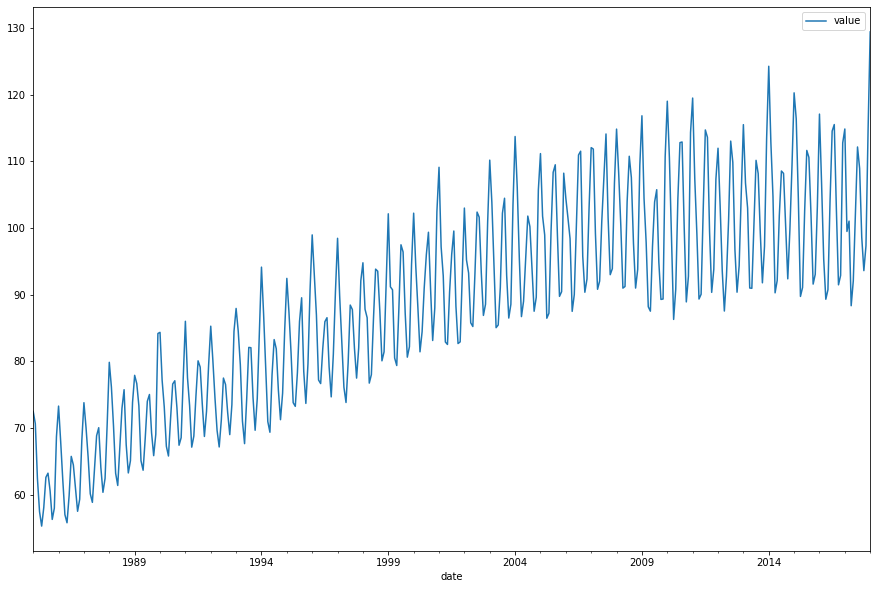

In [ ]:
df.plot(x='date', y='value', figsize=(15, 10))

As we see, the model changes somewhere around 2009.

Experiment 1: train before model change happens

In-sample MSE: 4.11224946936598
Forecast MSE: 67.82265926959067


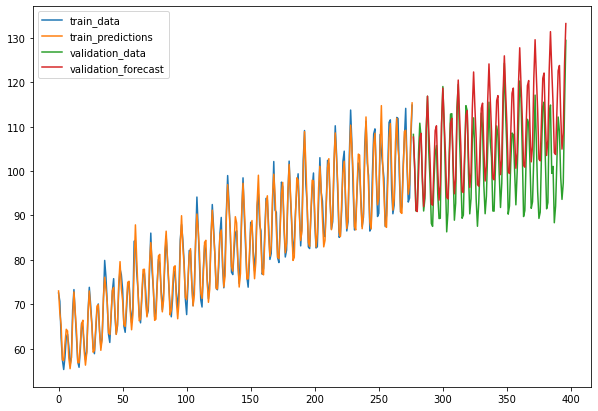

In [ ]:
df_train, df_val = train_test_split(df, test_size=0.3, shuffle=False)

fit_result = ExponentialSmoothing(
    df_train.value,
    trend="add", seasonal="mul",
    # the default initialization method estimates parameters from data
    initialization_method='estimated',
    # 12 months in the year
    seasonal_periods=12,
).fit()
forecast = fit_result.forecast(df_val.shape[0])
evaluate_forecast_quality(df_train.value, df_val.value, fit_result.fittedvalues, forecast)

Experiment 2: train after model change happens

In-sample MSE: 4.867174058923112
Forecast MSE: 19.795772334309696


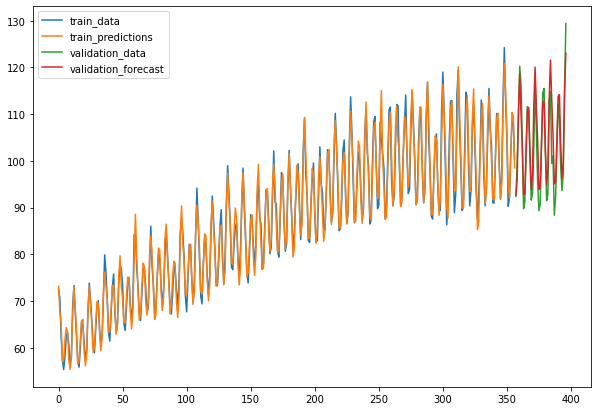

In [ ]:
df_train, df_val = train_test_split(df, test_size=0.1, shuffle=False)

fit_result = ExponentialSmoothing(
    df_train.value,
    trend="add", seasonal="mul",
    initialization_method='estimated',
    seasonal_periods=12,
).fit()
forecast = fit_result.forecast(df_val.shape[0])
evaluate_forecast_quality(df_train.value, df_val.value, fit_result.fittedvalues, forecast)

As we see, the model adapts to changes in data.

# Home Assignment 9
## Exercise 1 (6 points): Minimum daily temperatures
This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

The units are in degrees Celsius and there are 3650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv")
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


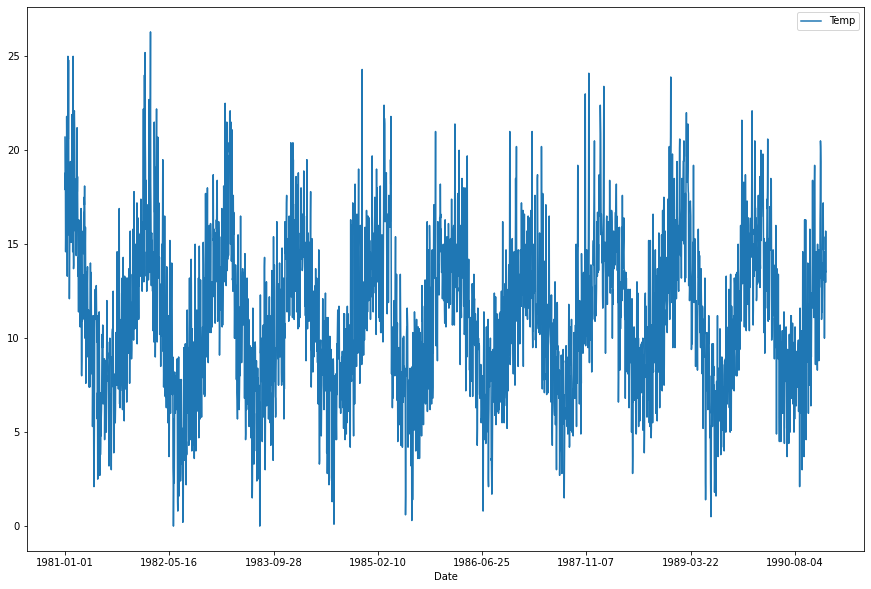

In [ ]:
df.plot(x='Date', y='Temp', figsize=(15, 10))

Your task is as follows:
- Split the data into train and validation, validation is 10% of the original dataset
- Choose the model of ExponentialSmoothing by looking on the data:
  - What model of trend should be used?
  - What seasonality settings will describe the data?
- Train the model and evaluate its performance (MSE) on both train and validation. Use `evaluate_forecast_quality()` function.

In [ ]:
# YOUR CODE HERE